The code in the cell below imports all of the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from os import path
from PIL import Image
pd.set_option('mode.chained_assignment', None)

%matplotlib inline

The cell below read the stackoverflow survey from the local working directory and selected only the rows that are located in the US

In [10]:
# Read the csv file into a dataframe
df = pd.read_csv('./survey_results_public.csv')

# Select data from users that are only from the US since salary is dependent on geographical location
us_data = df[df["Country"]=="United States"]

The cell below describes all the columns including categorical columns for data exploration

In [9]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
us_data.describe(include="all")

,Respondent,Professional,ProgramHobby,Country,University,...,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
count,11455.000000,11455,11455,11455,11455,...,8577,8565,8607,3781.000000,468.000000
unique,NaN,5,4,1,4,...,5,5,5,NaN,NaN
top,NaN,Professional developer,"Yes, I program as a hobby",United States,No,...,Agree,Disagree,Strongly agree,NaN,NaN
freq,NaN,8310,5602,11455,9627,...,3858,5160,3827,NaN,NaN
mean,25880.425229,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,96194.754635,68535.918544
...,...,...,...,...,...,...,...,...,...,...,...
min,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.000000,0.000000
25%,11861.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,70000.000000,55000.000000
50%,26039.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,93000.000000,70000.000000
75%,40967.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,120000.000000,80000.000000


Business Question 1 - What is the average salary of all users of a certain language?

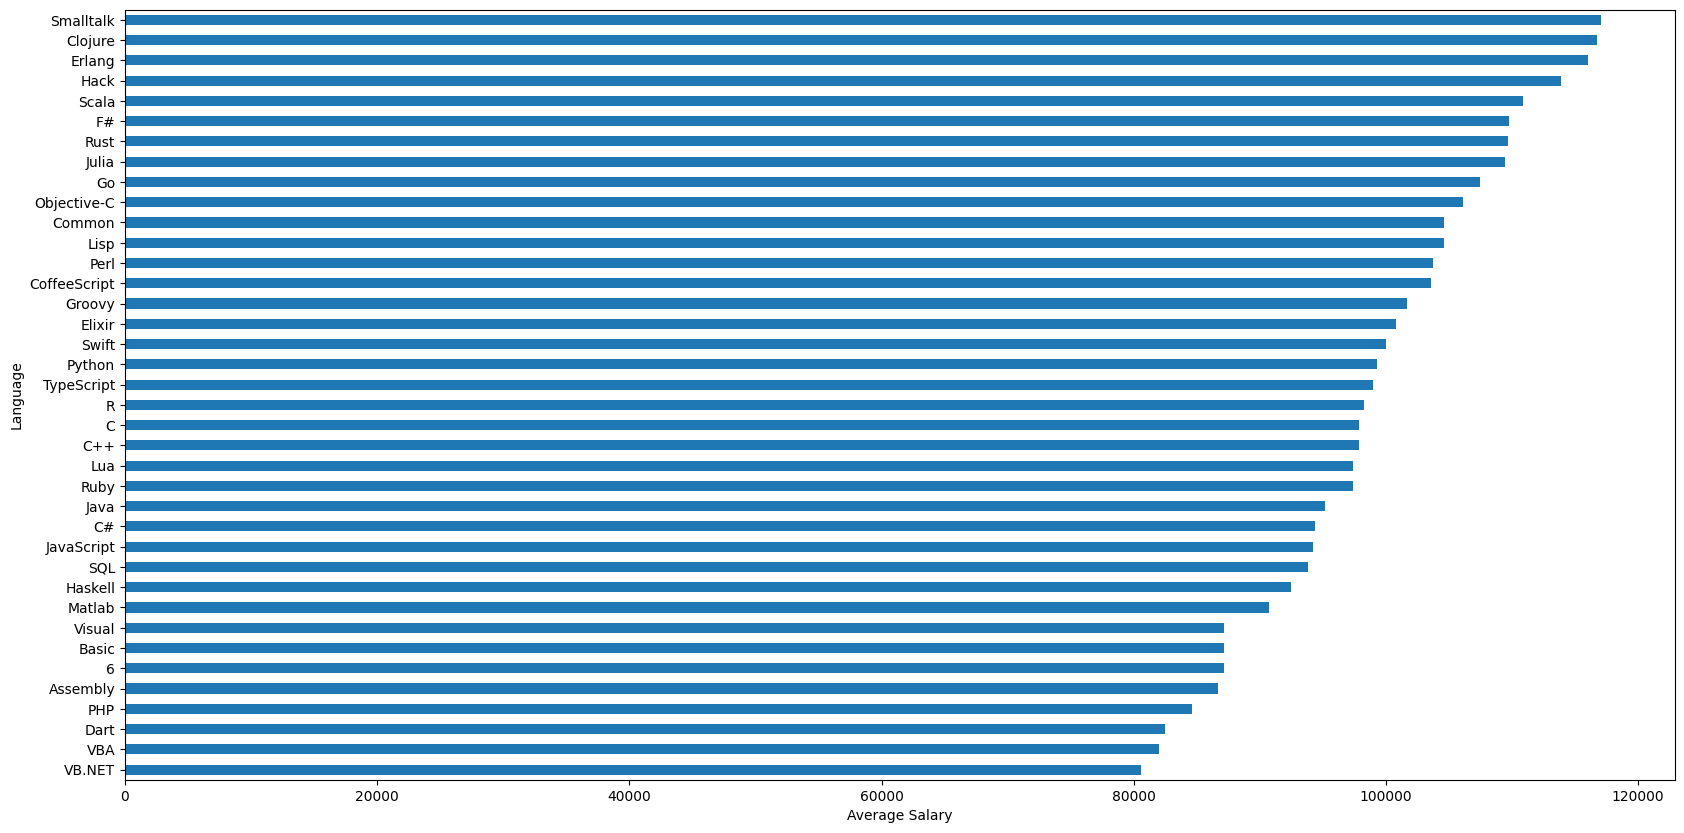

In [13]:
# Drop all rows that do not have a language listed since their salary data is not tied a language
language_drop = us_data.dropna(subset=["HaveWorkedLanguage"],axis=0)

# Parses out all unique languages respondents reported in a set
language_dict = []
for index, row in language_drop.iterrows():
    try:
        languages=row["HaveWorkedLanguage"].split()
        for language in languages:
            if language not in language_dict:
                language_dict.append(str(language))
    except Exception as e:
        print(e)
language_dict = [s.replace(';','') for s in language_dict]
language_dict=set(language_dict)

# Calulcate average salary of users each language and and store into salary_language_average dataframe
salary_language_average = pd.DataFrame(language_dict,columns=["Language"])
salary_language_average["AverageSalaray"] = 0
for index, row in salary_language_average.iterrows():
    ave=language_drop[language_drop["HaveWorkedLanguage"].str.contains(row["Language"])]["Salary"].mean()
    salary_language_average["AverageSalaray"].loc[index]=ave

 # Plot the average salary of users each language  
salary_language_average.set_index('Language', inplace=True)
salary_language_average.sort_values('AverageSalaray').plot(kind='barh', legend=None, figsize=(20,10))
plt.xlabel("Average Salary")
plt.ylabel("Language")
plt.show()

Business Question 2 - What is the average salary of all users of a certain framework?

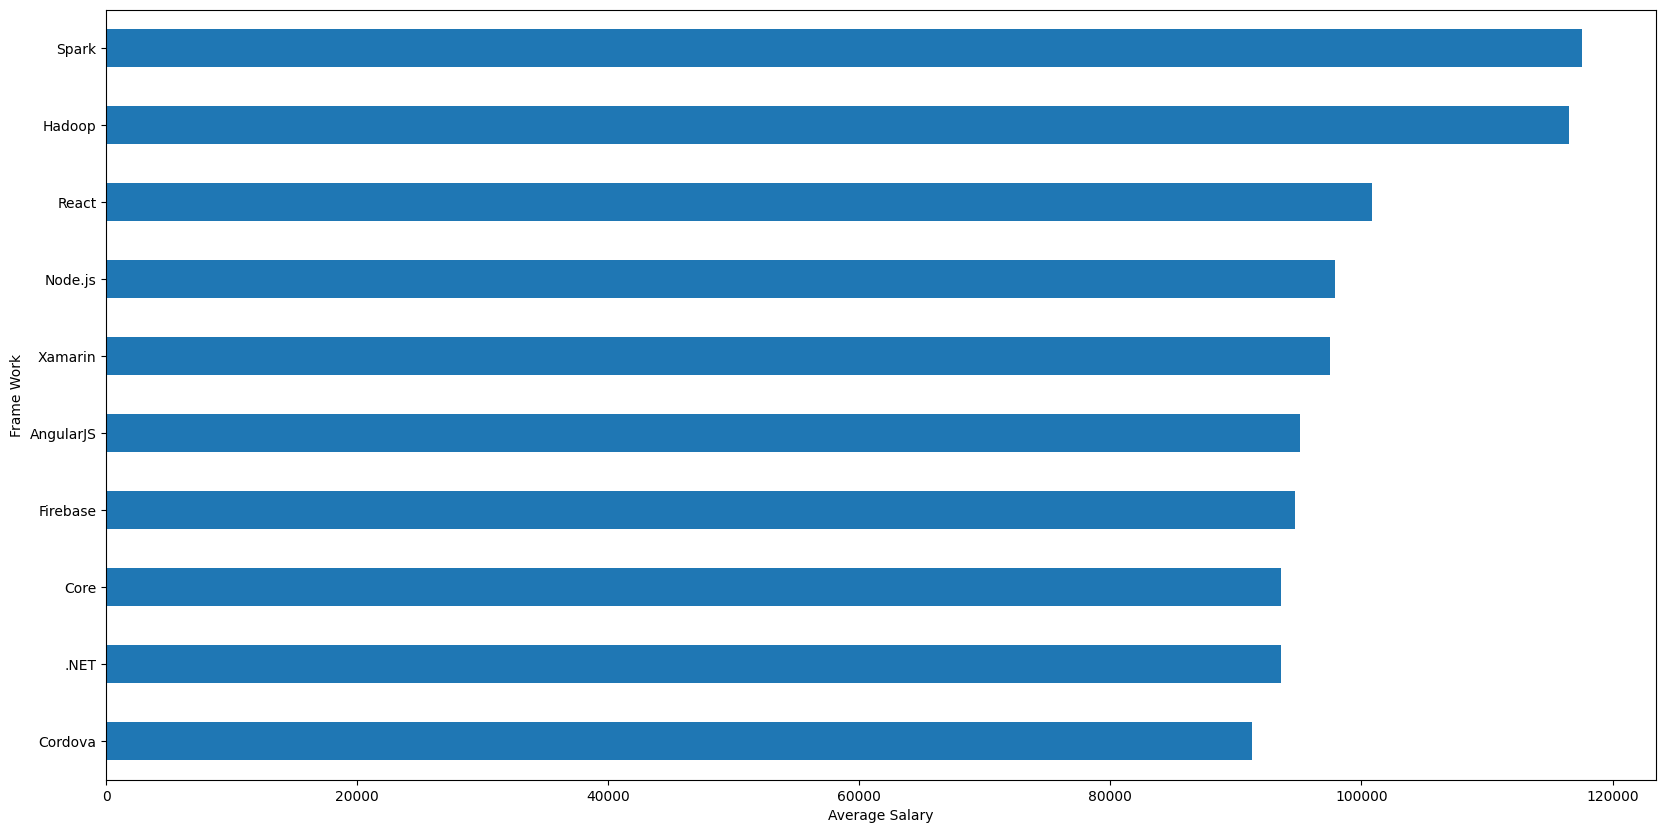

In [14]:
# Drop all rows that do not have a framework listed since their salary data is not tied a framework
framework_drop=us_data.dropna(subset=["HaveWorkedFramework"],axis=0)

# Parses out all unique frameworks respondents reported in a set
framework_dict=[]
for index, row in framework_drop.iterrows():
    try:
        frameworks=row["HaveWorkedFramework"].split()
        for framework in frameworks:
            if framework not in framework_dict:
                framework_dict.append(str(framework))
    except Exception as e:
        print(e)
framework_dict=[s.replace(';','') for s in framework_dict]
framework_dict=set(framework_dict)

# Calulcate average salary of users each frawework and and store into framework_salary
framework_salary = pd.DataFrame(framework_dict,columns=["Framework"])
framework_salary["AverageSalaray"]=0
for index, row in framework_salary.iterrows():
    ave=framework_drop[framework_drop["HaveWorkedFramework"].str.contains(row["Framework"])]["Salary"].mean()
    framework_salary["AverageSalaray"].loc[index]=ave

 # Plot the average salary of users each Framework
framework_salary.set_index('Framework', inplace=True)
framework_salary.sort_values('AverageSalaray').plot(kind='barh', legend=None, figsize=(20,10))
plt.xlabel("Average Salary")
plt.ylabel("Frame Work")
plt.show()

Business Question 3 - What is the average salary of all users of a certain database?

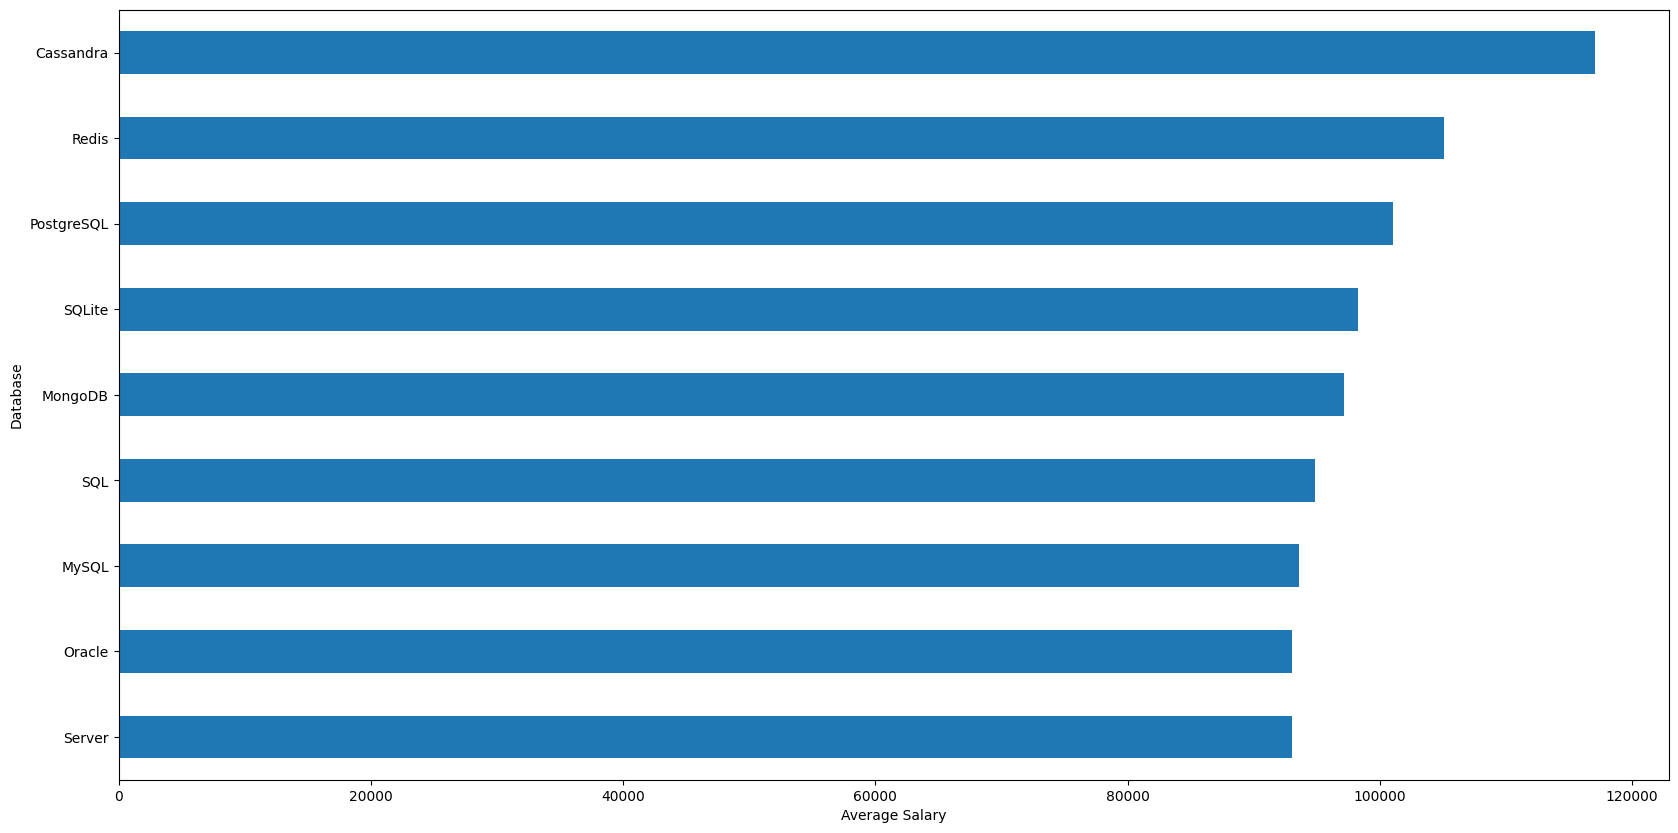

In [15]:
# Drop all rows that do not have a database listed since their salary data is not tied a database
database_drop=us_data.dropna(subset=["HaveWorkedDatabase"],axis=0)

# Parses out all unique database respondents reported in a set
database_dict=[]
for index, row in database_drop.iterrows():
    try:
        databases=row["HaveWorkedDatabase"].split()
        for database in databases:
            if database not in database_dict:
                database_dict.append(str(database))
    except Exception as e:
        print(e)
database_dict=[s.replace(';','') for s in database_dict]
database_dict=set(database_dict)

# Calulcate average salary of users each database and and store into framework_salary
salary_database=pd.DataFrame(database_dict,columns=["Database"])
salary_database["AverageSalaray"]=0
for index, row in salary_database.iterrows():
    ave=database_drop[database_drop["HaveWorkedDatabase"].str.contains(row["Database"])]["Salary"].mean()
    salary_database["AverageSalaray"].loc[index]=ave

 # Plot the average salary of users each database
salary_database.set_index('Database', inplace=True)
salary_database.sort_values('AverageSalaray').plot(kind='barh', legend=None, figsize=(20,10))
plt.xlabel("Average Salary")
plt.ylabel("Database")
plt.show()


In [24]:
dev_drop=us_data.dropna(subset=["DeveloperType"],axis=0)

# Parses out all unique database respondents reported in a set
dev_dict=[]
for index, row in dev_drop.iterrows():
    try:
        devs=row["DeveloperType"].split()
        for dev in devs:
            if dev not in dev_dict:
                dev_dict.append(str(dev))
    except Exception as e:
        print(e)
dev_dict=[s.replace(';','') for s in dev_dict]
dev_dict=set(dev_dict)


In [26]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

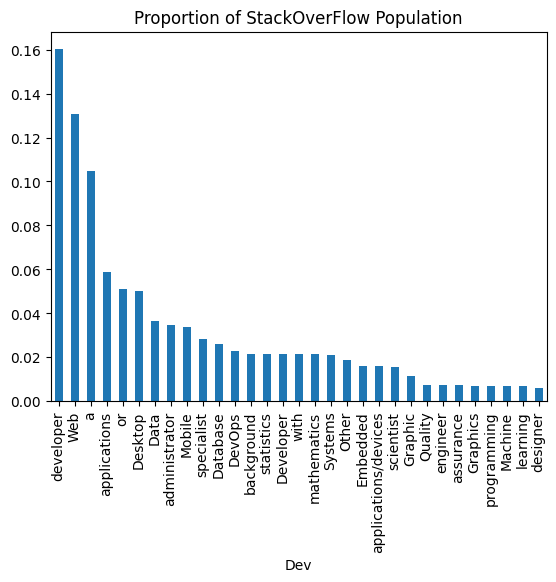

In [30]:
devtype = us_data['DeveloperType'].value_counts().reset_index()
devtype.rename(columns={'DeveloperType':"Dev"}, inplace=True)
devtype_df = total_count(devtype, 'Dev', 'count', dev_dict)
devtype_df.set_index('Dev', inplace=True)
(devtype_df/devtype_df.sum()).plot(kind='bar', legend=None)
plt.title("Proportion of StackOverFlow Population")
plt.show()